<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

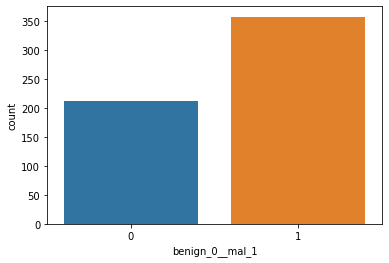

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

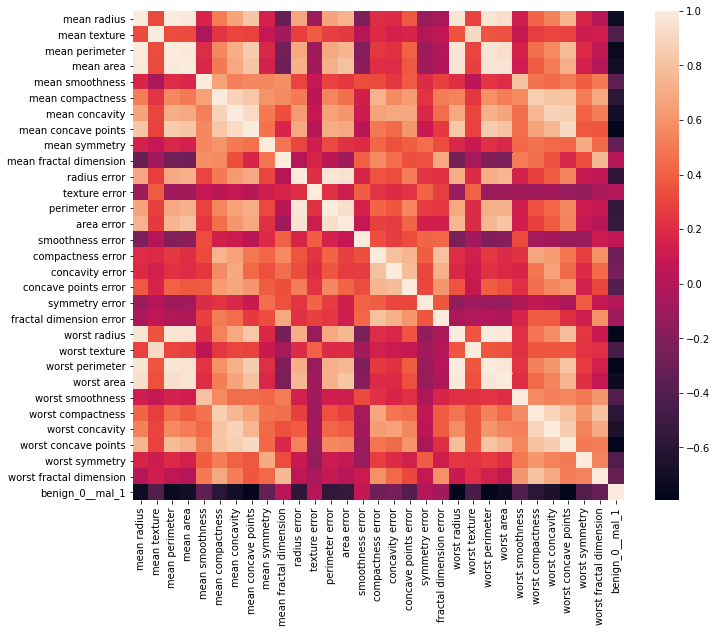

In [9]:
plt.figure(figsize=(11,9))
sns.heatmap(df.corr())

In [10]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

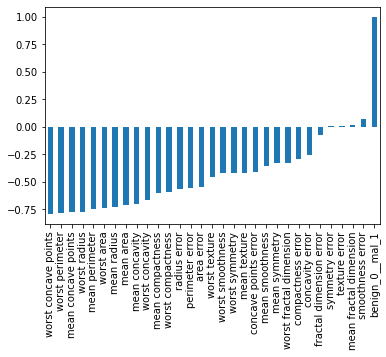

In [11]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

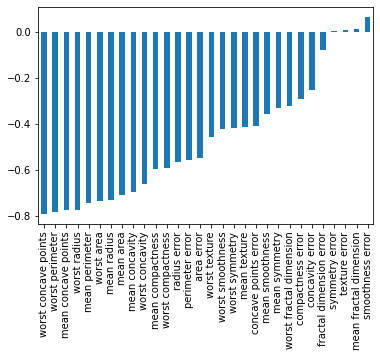

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [13]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler()

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [21]:
X_train.shape

(426, 30)

In [22]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [23]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,  #<-----too many epochs
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6776 - val_loss: 0.6586
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6479 - val_loss: 0.6310
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6178 - val_loss: 0.5972
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5822 - val_loss: 0.5600
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5459 - val_loss: 0.5161
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4994 - val_loss: 0.4660
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4475 - val_loss: 0.4131
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3967 - val_loss: 0.3673
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3617 - val_loss: 0.3258
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3140 - val_loss: 0.2872
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0480 - val_loss: 0.1144
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0545 - val_loss: 0.1014
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0402 - val_loss: 0.1093
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0976
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0388 - val_loss: 0.1115
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0583 - val_loss: 0.0970
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0599 - val_loss: 0.1085
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0509 - val_loss: 0.1063
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.1101
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.1043


14/14 [==============================] - 0s 2ms/step - loss: 0.0347 - val_loss: 0.1246
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0390 - val_loss: 0.1189
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.1120
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0398 - val_loss: 0.1397
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0391 - val_loss: 0.1250
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0352 - val_loss: 0.1344
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0468 - val_loss: 0.1208
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0442 - val_loss: 0.1281
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0339 - val_loss: 0.1166
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.1176
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 0.1687
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0545 - val_loss: 0.1191
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0351 - val_loss: 0.1664
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0373 - val_loss: 0.1248
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0395 - val_loss: 0.1847
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0408 - val_loss: 0.1357
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.1556
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0303 - val_loss: 0.1309
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0373 - val_loss: 0.1511
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0345 - val_loss: 0.1415
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0384 - val_loss: 0.1868
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0273 - val_loss: 0.1593
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0321 - val_loss: 0.1444
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0313 - val_loss: 0.1842
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0357 - val_loss: 0.1595
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0369 - val_loss: 0.1553
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0324 - val_loss: 0.1768
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0283 - val_loss: 0.1385
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0342 - val_loss: 0.1812
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0277 - val_loss: 0.1604
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0316 - val_loss: 0.1718
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0326 - val_loss: 0.1722
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0210 - val_loss: 0.1972
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0371 - val_loss: 0.1645
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0285 - val_loss: 0.2133
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0272 - val_loss: 0.1678
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0266 - val_loss: 0.2035
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0322 - val_loss: 0.1838
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0282 - val_loss: 0.1943
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0261 - val_loss: 0.1903
Epoc

Epoch 488/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0249 - val_loss: 0.2278
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0262 - val_loss: 0.2198
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.2062
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0200 - val_loss: 0.2844
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0307 - val_loss: 0.1962
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0240 - val_loss: 0.2448
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.2016
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0191 - val_loss: 0.2632
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.1835
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0212 - val_los

Epoch 569/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.2515
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0152 - val_loss: 0.2712
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0237 - val_loss: 0.2538
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.2761
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.2468
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.2595
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.2679
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.2351
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0260 - val_loss: 0.2599
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0238 - val_los

In [113]:
# model.history.history

In [24]:
model_loss = pd.DataFrame(model.history.history)

In [115]:
# model_loss

<AxesSubplot:>

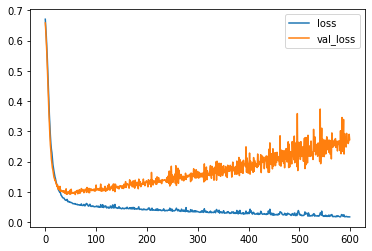

In [25]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [26]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [29]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=0,
          callbacks=[early_stop]
          )

Epoch 00077: early stopping


<AxesSubplot:>

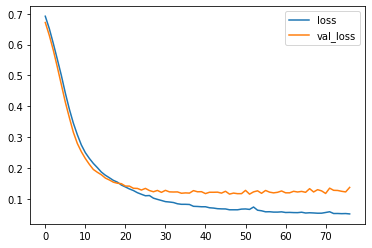

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6750 - val_loss: 0.6549
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6439 - val_loss: 0.6296
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6453 - val_loss: 0.6081
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6198 - val_loss: 0.5830
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6056 - val_loss: 0.5559
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5661 - val_loss: 0.5281
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5344 - val_loss: 0.4932
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4979 - val_loss: 0.4645
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5124 - val_loss: 0.4322
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4950 - val_loss: 0.4099
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0897 - val_loss: 0.0912
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1126 - val_loss: 0.0956
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0890 - val_loss: 0.0987
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0915 - val_loss: 0.0979
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1001 - val_loss: 0.0917
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0939 - val_loss: 0.0958
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1086 - val_loss: 0.0909
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1073 - val_loss: 0.0970
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0937 - val_loss: 0.0931
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0936 - val_loss: 0.0913


<AxesSubplot:>

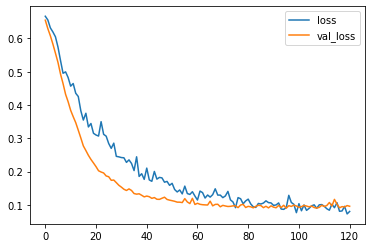

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [50]:
#predictions = model.predict_classes(X_test) #deprecated
predictions = (model.predict(X_test) > 0.5).astype('int32')

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [53]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
